# Task # 4 - To Explore Decision Tree Algorithm


For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset :
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing


In [1]:
import os
# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning
import sklearn
import imblearn

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
# set the working directory
os.chdir("F:\Python\Project\TSP Task 3")

In [3]:
#load the data
df = pd.read_csv("Iris.csv")

In [4]:
df.shape

(150, 6)

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Descriptive Statistics

In [7]:
df.describe().style.background_gradient(cmap = 'copper')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Treatment of Missing Values

In [8]:
#Missing Value Analysis in Train data
missing_val=pd.DataFrame(df.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,Id,0
1,SepalLengthCm,0
2,SepalWidthCm,0
3,PetalLengthCm,0
4,PetalWidthCm,0
5,Species,0


No Missing Value Present on Data

# Multivariate Analysis

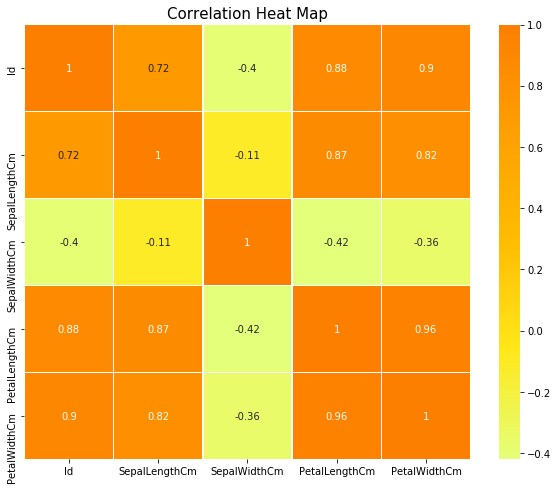

In [9]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

# Splitting the data

In [10]:
# splitting X and y into training and testing dataset

x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

# Decision Tree Algorithm

In [11]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
##apply the model on test data
y_pred = model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

# Accuracy

In [13]:
print("Model Accuracy :", model.score(x_train, y_train)*100)
print("Testing Accuracy :", accuracy_score(y_test , y_pred)*100)

Model Accuracy : 100.0
Testing Accuracy : 97.77777777777777


# Confusion Matrix

In [14]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]], dtype=int64)

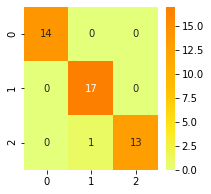

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# Classification Report

In [16]:
# lets take a look at the Classification Report

cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



# Let us visualize the Decision Tree to understand it better

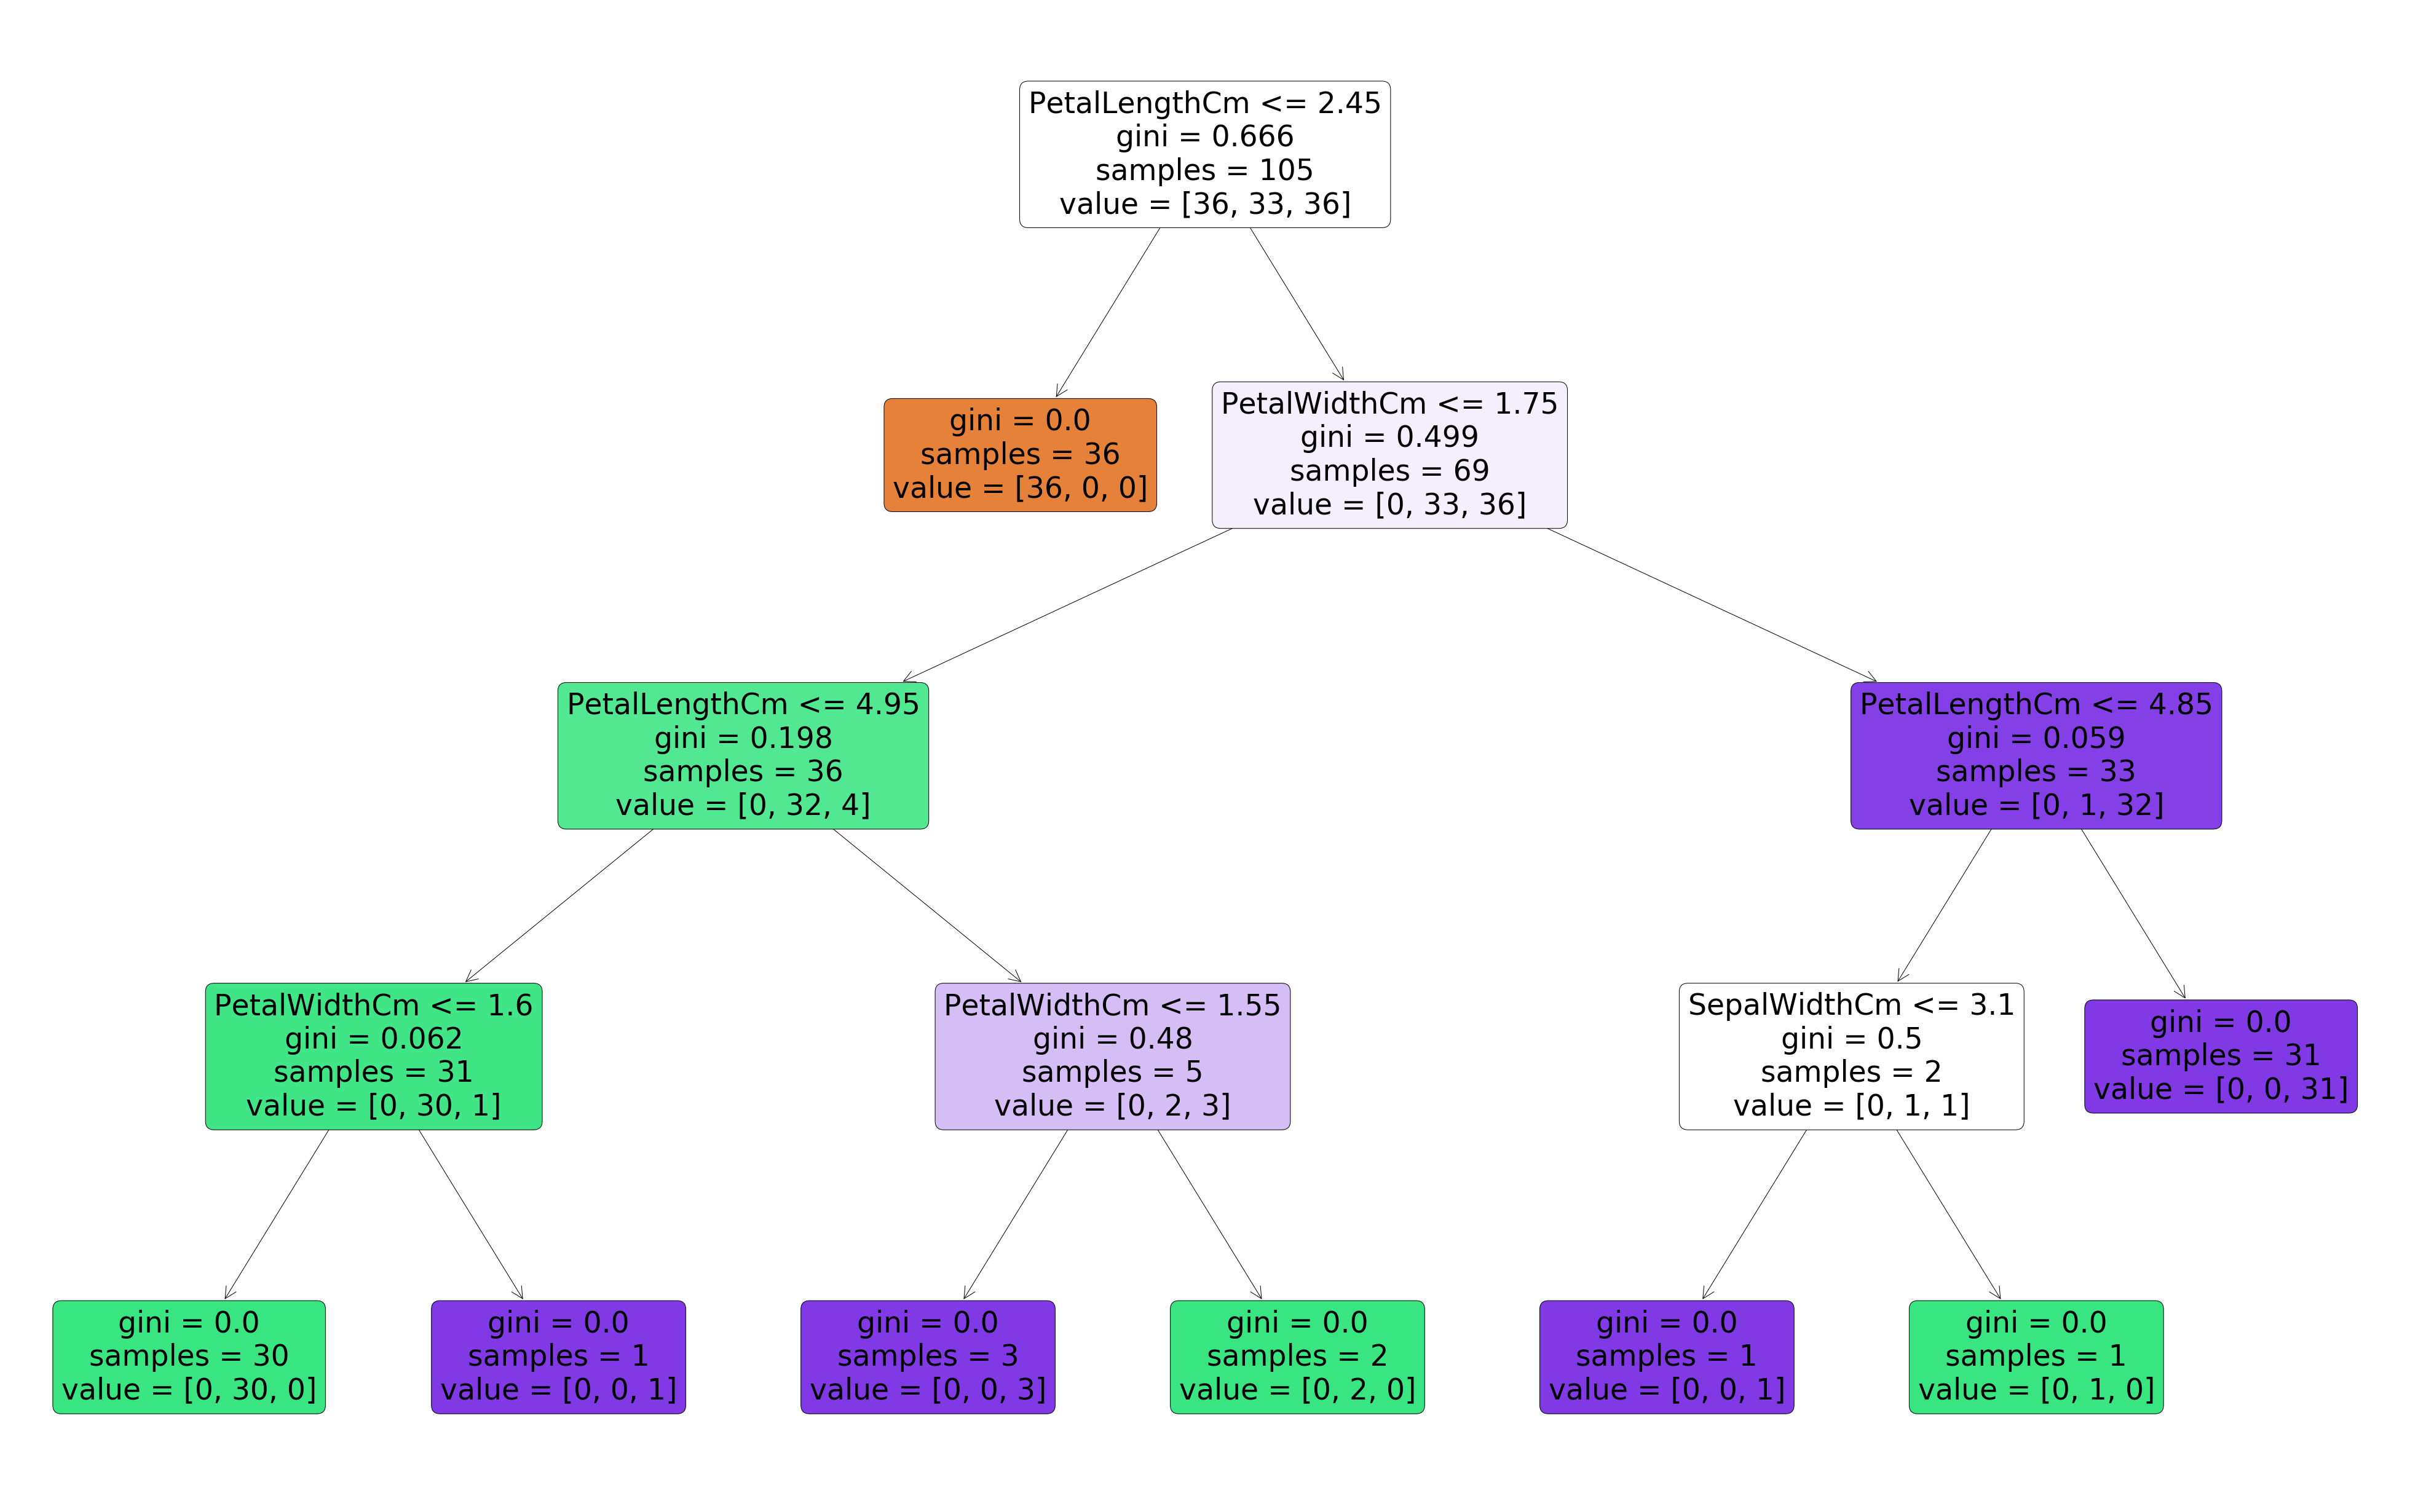

In [17]:
Feature_names=list(df.columns[1:])

plt.figure(figsize = (70,45))

plot_tree(model, feature_names =Feature_names, rounded = True, filled=True)
plt.show()

# Thank You

~Raman Kumar